In [1]:
import random

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

%matplotlib inline

tf.enable_eager_execution()

s = open('test.jpg', 'rb').read()
img = tf.image.decode_jpeg(s)

/usr/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [83]:
height, width, _ = img.shape
height, width = height.value, width.value
print(height, width)

768 1024


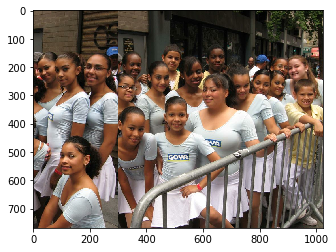

In [5]:
im = tf.reverse_sequence(img,
                         seq_lengths=[300] * height,
                         seq_axis=1, batch_axis=0)
plt.imshow(im)

res.shape (1, 2, 3, 750000)
big.shape (1, 1000, 1500, 3)


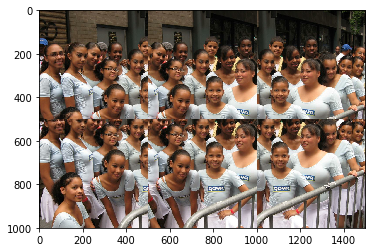

In [97]:
res = tf.extract_image_patches(
    tf.expand_dims(img, axis=0),
    ksizes=[1, 500, 500, 1],
    strides=[1, 200, 200, 1],
    rates=[1, 1, 1, 1],
    padding='VALID',
)
print('res.shape', res.shape)
big = tf.depth_to_space(res, block_size=500)
print('big.shape', big.shape)
plt.imshow(tf.squeeze(big))

In [58]:
x = np.random.random([1, 2, 3, 10])
print(x.shape)
x = tf.squeeze(x)
print(x.shape)
print(x)
y = tf.unstack(x, axis=1)
print(len(y))
y0 = y[0]
print(y0.shape)
print(y0)
z = tf.concat(y, axis=0)
print(z.shape)


(1, 2, 3, 10)
(2, 3, 10)
tf.Tensor(
[[[0.15166404 0.73828668 0.80831994 0.18050985 0.95891887 0.65677344
   0.93225032 0.11231863 0.30635352 0.84440802]
  [0.42597701 0.90280299 0.26989836 0.2645954  0.16576168 0.26196828
   0.70753454 0.08422207 0.31117787 0.30920776]
  [0.44876136 0.24749715 0.68087    0.78326661 0.88638143 0.62378481
   0.16302951 0.46212365 0.24132045 0.54493603]]

 [[0.54042158 0.47355422 0.03491518 0.64214911 0.2029795  0.79527283
   0.44863846 0.27915925 0.87521767 0.89785436]
  [0.83731953 0.01514228 0.98924566 0.64726204 0.71805452 0.74668816
   0.83830332 0.74511919 0.79243951 0.73639044]
  [0.33507343 0.79718104 0.74916647 0.68339336 0.98575076 0.81708097
   0.70949701 0.34002602 0.88373139 0.74807635]]], shape=(2, 3, 10), dtype=float64)
3
(2, 10)
tf.Tensor(
[[0.15166404 0.73828668 0.80831994 0.18050985 0.95891887 0.65677344
  0.93225032 0.11231863 0.30635352 0.84440802]
 [0.54042158 0.47355422 0.03491518 0.64214911 0.2029795  0.79527283
  0.44863846 0.27915

(1, 3, 4, 196608)
(3, 4, 196608)


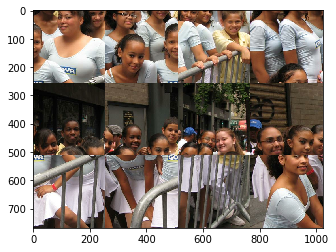

In [110]:
res = tf.space_to_depth(tf.expand_dims(img, 0), 256)
print(res.shape)
im = tf.squeeze(res)
im = tf.random_shuffle(im)
im = tf.transpose(im, [1, 0, 2])
im = tf.random_shuffle(im)
im = tf.transpose(im, [1, 0, 2])
print(im.shape)
res2 = tf.depth_to_space(tf.expand_dims(im, 0), 256)
im = tf.squeeze(res2)
plt.imshow(im)

In [90]:
img2 = tf.depth_to_space(
    tf.space_to_depth(
        tf.expand_dims(img, axis=0),
        block_size=128),
    block_size=128)
print(img2.shape)
print(np.array_equal(tf.squeeze(img2).numpy(), img.numpy()))
    

(1, 768, 1024, 3)
True
